In [1]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
# Initialize a list of tickers for the stock
tickers = ["LYV", "AMC", "AMZN", "NFLX", "DRI", "RUTH", "DAL", "AAL"]

#Define the variables
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

# Initialize an empty list to store the dataframes for each stock
dfs = []

# Fetch the data for each stock and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Daily Trade Value for each stock
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

#Change Datetime to Type Integer
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

combined_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Trade Value
0,LYV,1420070400000000000,26.219999,26.379999,24.709999,25.110001,25.110001,2973500,7.466459e+07
1,LYV,1420675200000000000,25.389999,25.940001,24.440001,24.680000,24.680000,3113900,7.685105e+07
2,LYV,1421280000000000000,24.750000,25.120001,24.330000,24.780001,24.780001,2537000,6.286686e+07
3,LYV,1421884800000000000,24.950001,25.709999,24.500000,24.549999,24.549999,4677400,1.148302e+08
4,LYV,1422489600000000000,24.559999,24.770000,23.530001,24.389999,24.389999,6481700,1.580887e+08
...,...,...,...,...,...,...,...,...,...
413,AAL,1669852800000000000,14.460000,14.570000,13.530000,13.550000,13.550000,126615800,1.715644e+09
414,AAL,1670457600000000000,13.650000,14.740000,13.240000,13.350000,13.350000,152529900,2.036274e+09
415,AAL,1671062400000000000,13.160000,13.310000,12.380000,13.030000,13.030000,124570400,1.623152e+09
416,AAL,1671667200000000000,12.980000,13.000000,12.230000,12.320000,12.320000,81902700,1.009041e+09


In [3]:
#Define a function for making scatter plot pre-cvoid
def precovid(x_values, y_values, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2015 to 2019')
    plt.ylabel('Volume')
    plt.title(title)

    plt.show()
    print(f"The r-value is: {r_value}")

In [4]:
#Define a function for making scatter plot post-covid
def postcovid(x_values, y_values, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2020 to Present')
    plt.ylabel('Volume')
    plt.title(title)

    plt.show()
    print(f"The r-value is: {r_value}")

In [5]:
#Define dataframes for pre/post covid per ticker

#precovid
precovid_lyv = combined_df[(combined_df['Ticker']=='LYV') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_amc = combined_df[(combined_df['Ticker']=='AMC') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_amzn = combined_df[(combined_df['Ticker']=='AMZN') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_nflx = combined_df[(combined_df['Ticker']=='NFLX') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_dri = combined_df[(combined_df['Ticker']=='DRI') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_ruth = combined_df[(combined_df['Ticker']=='RUTH') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_dal = combined_df[(combined_df['Ticker']=='DAL') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_aal = combined_df[(combined_df['Ticker']=='AAL') & (combined_df['Date'].values <= 1577750400000000000)] 

#postcovid
postcovid_lyv = combined_df[(combined_df['Ticker'] == 'LYV')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_amc = combined_df[(combined_df['Ticker'] == 'AMC')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_amzn = combined_df[(combined_df['Ticker'] == 'AMZN')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_nflx = combined_df[(combined_df['Ticker'] == 'NFLX')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_dri = combined_df[(combined_df['Ticker'] == 'DRI')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_ruth = combined_df[(combined_df['Ticker'] == 'RUTH')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_dal = combined_df[(combined_df['Ticker'] == 'DAL')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_aal = combined_df[(combined_df['Ticker'] == 'AAL')&(combined_df['Date'].values>=1577836800000000000)]


In [6]:
#Pre Coivd Ticker Linear Regression Graphs

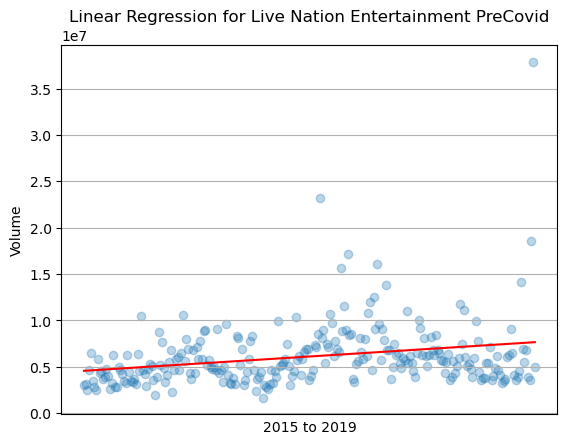

The r-value is: 0.2593899291496842


<Figure size 640x480 with 0 Axes>

In [8]:
# Linear regression on PreCovid 
precovid(precovid_lyv['Date'], precovid_lyv['Volume'], title='Linear Regression for Live Nation Entertainment PreCovid')
plt.savefig("output_data/PreCovid_LYV.png")

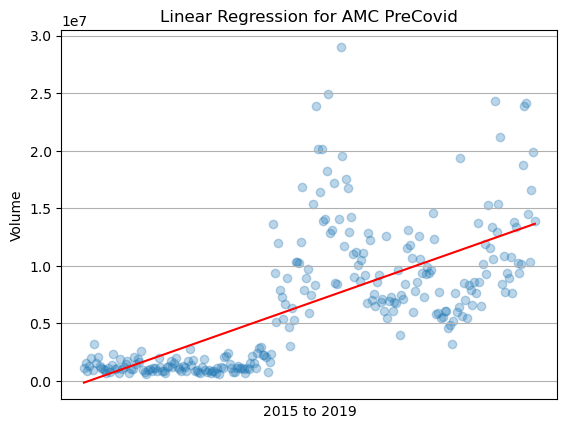

The r-value is: 0.6786404559824524


<Figure size 640x480 with 0 Axes>

In [9]:
precovid(precovid_amc['Date'], precovid_amc['Volume'], title='Linear Regression for AMC PreCovid')
plt.savefig("output_data/PreCovid_AMC.png")

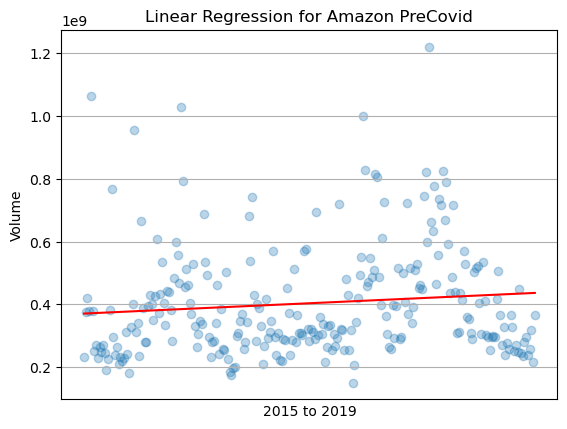

The r-value is: 0.1085300427206932


<Figure size 640x480 with 0 Axes>

In [10]:
precovid(precovid_amzn['Date'], precovid_amzn['Volume'], title='Linear Regression for Amazon PreCovid')
plt.savefig("output_data/PreCovid_AMZN.png")

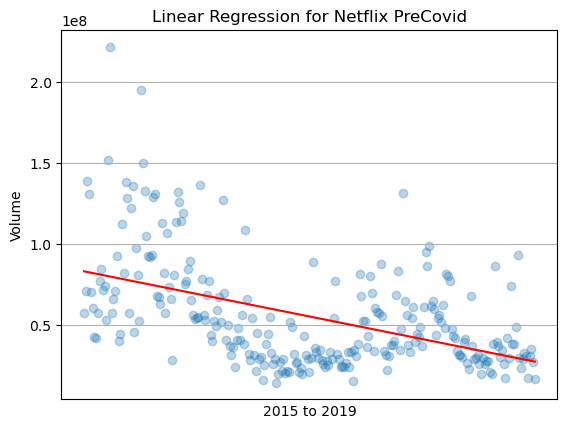

The r-value is: -0.4840255009507073


<Figure size 640x480 with 0 Axes>

In [11]:
precovid(precovid_nflx['Date'], precovid_nflx['Volume'], title='Linear Regression for Netflix PreCovid')
plt.savefig("output_data/PreCovid_NFLX.png")

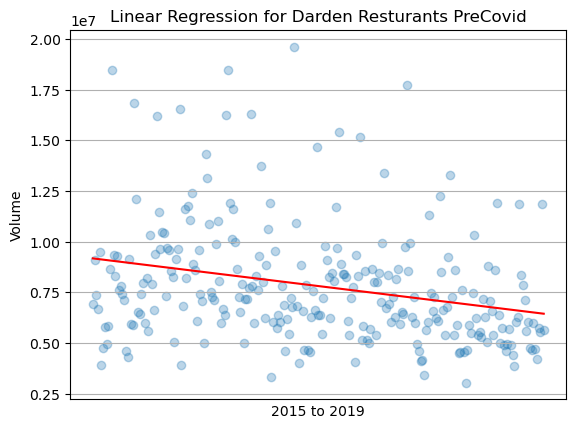

The r-value is: -0.2683529938986158


<Figure size 640x480 with 0 Axes>

In [12]:
precovid(precovid_dri['Date'], precovid_dri['Volume'], title='Linear Regression for Darden Resturants PreCovid')
plt.savefig("output_data/PreCovid_DRI.png")

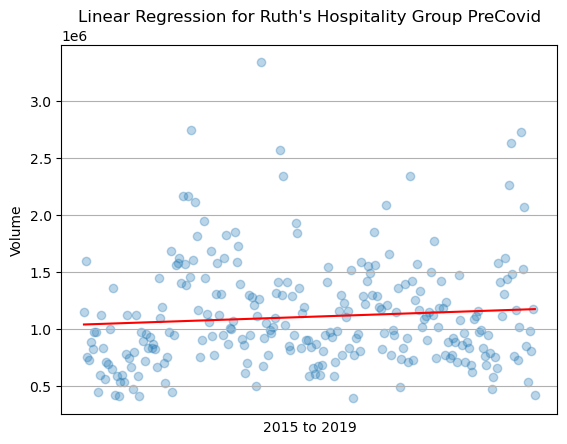

The r-value is: 0.08475899548750115


<Figure size 640x480 with 0 Axes>

In [13]:
precovid(precovid_ruth['Date'], precovid_ruth['Volume'], title="Linear Regression for Ruth's Hospitality Group PreCovid")
plt.savefig("output_data/PreCovid_Ruth.png")

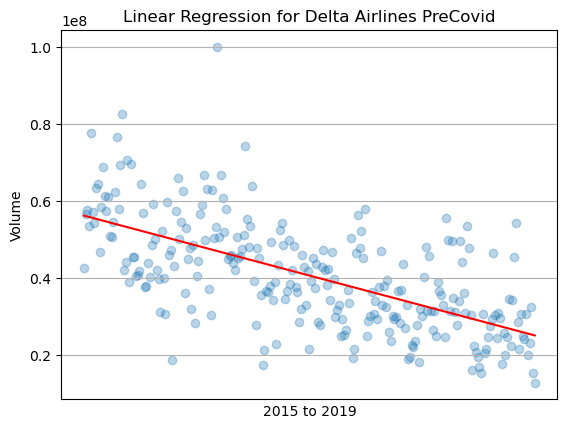

The r-value is: -0.6377969213249919


<Figure size 640x480 with 0 Axes>

In [14]:
precovid(precovid_dal['Date'], precovid_dal['Volume'], title='Linear Regression for Delta Airlines PreCovid')
plt.savefig("output_data/PreCovid_DAL.png")

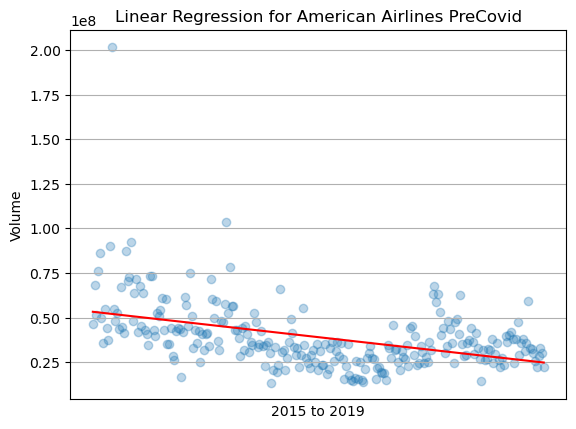

The r-value is: -0.44166434174075997


<Figure size 640x480 with 0 Axes>

In [15]:
precovid(precovid_aal['Date'], precovid_aal['Volume'], title='Linear Regression for American Airlines PreCovid')
plt.savefig("output_data/PreCovid_AAL.png")

In [16]:
#Post Coivd Ticker Linear Regression Graphs

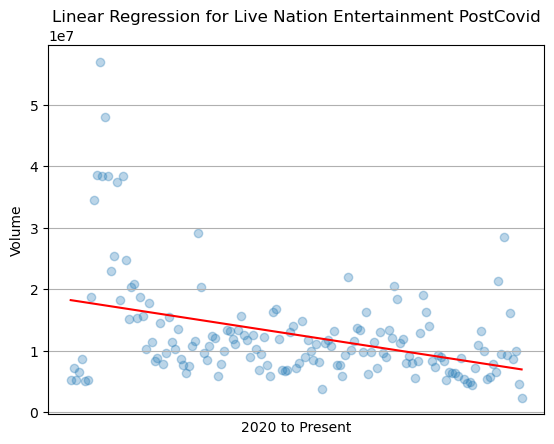

The r-value is: -0.3907135303243779


<Figure size 640x480 with 0 Axes>

In [17]:
postcovid(postcovid_lyv['Date'], postcovid_lyv['Volume'], title='Linear Regression for Live Nation Entertainment PostCovid')
plt.savefig("output_data/PostCovid_LYV.png")

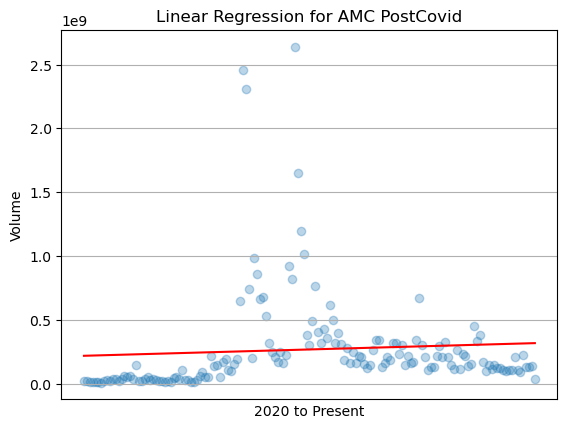

The r-value is: 0.07296152679969892


<Figure size 640x480 with 0 Axes>

In [18]:
postcovid(postcovid_amc['Date'], postcovid_amc['Volume'], title='Linear Regression for AMC PostCovid')
plt.savefig("output_data/PostCovid_AMC.png")

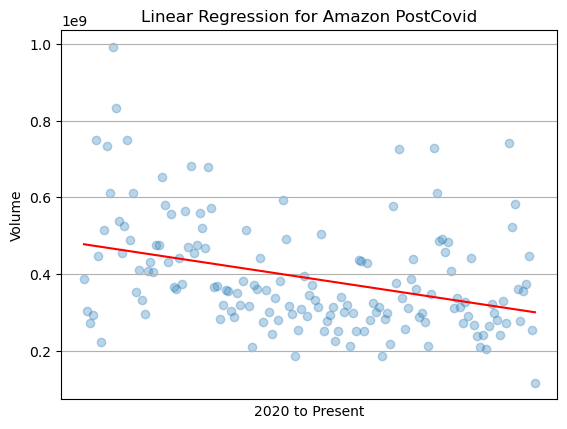

The r-value is: -0.35753579812315206


<Figure size 640x480 with 0 Axes>

In [19]:
postcovid(postcovid_amzn['Date'], postcovid_amzn['Volume'], title='Linear Regression for Amazon PostCovid')
plt.savefig("output_data/PostCovid_AMZN.png")

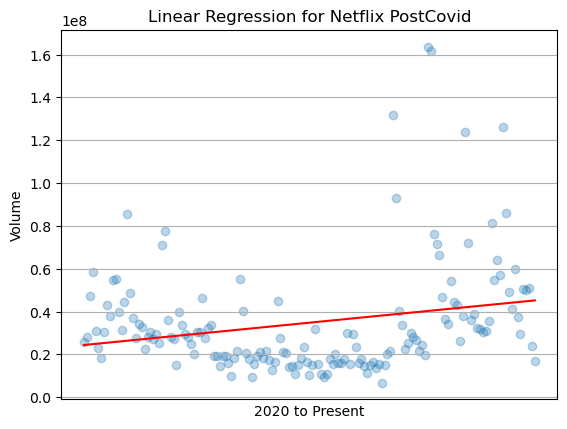

The r-value is: 0.23123111495530405


<Figure size 640x480 with 0 Axes>

In [20]:
postcovid(postcovid_nflx['Date'], postcovid_nflx['Volume'], title='Linear Regression for Netflix PostCovid')
plt.savefig("output_data/PostCovid_NFLX.png")

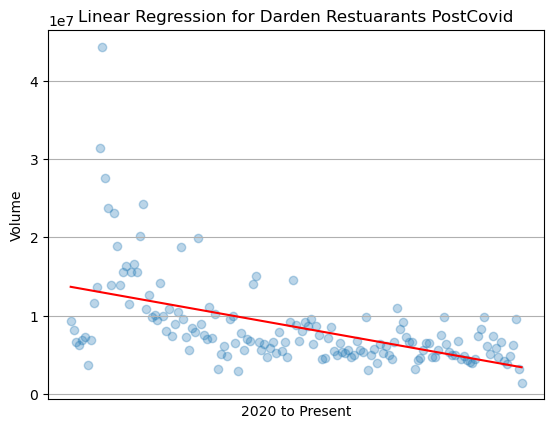

The r-value is: -0.5339225598843571


<Figure size 640x480 with 0 Axes>

In [21]:
postcovid(postcovid_dri['Date'], postcovid_dri['Volume'], title='Linear Regression for Darden Restuarants PostCovid')
plt.savefig("output_data/PostCovid_DRI.png")

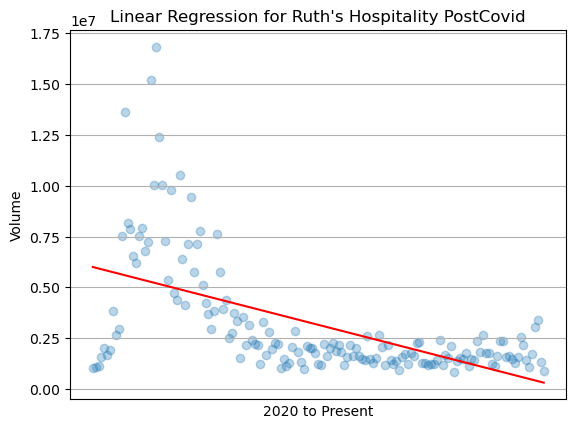

The r-value is: -0.5722574042954701


<Figure size 640x480 with 0 Axes>

In [22]:
postcovid(postcovid_ruth['Date'], postcovid_ruth['Volume'], title="Linear Regression for Ruth's Hospitality PostCovid")
plt.savefig("output_data/PostCovid_RUTH.png")

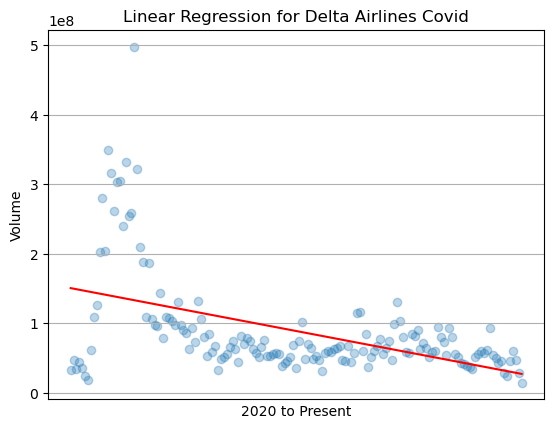

The r-value is: -0.4839522370678828


<Figure size 640x480 with 0 Axes>

In [23]:
postcovid(postcovid_dal['Date'], postcovid_dal['Volume'], title='Linear Regression for Delta Airlines Covid')
plt.savefig("output_data/PostCovid_DAL.png")

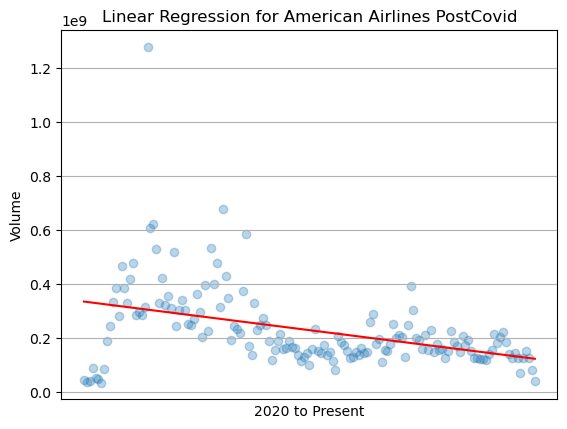

The r-value is: -0.4150009737669756


<Figure size 640x480 with 0 Axes>

In [24]:
postcovid(postcovid_aal['Date'], postcovid_aal['Volume'], title='Linear Regression for American Airlines PostCovid')
plt.savefig("output_data/PostCovid_AAL.png")